<a href="https://colab.research.google.com/github/ayush-2405/Trading-Strategies/blob/main/Bollinger_Bands_IMI_StochasticOscilltor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BOLLINGER BANDS**

Calculation of Bollinger Bands are composed of three lines. One of the more common calculations uses a 20-day simple moving average (SMA) for the middle band. The upper band is calculated by taking the middle band and adding twice the daily standard deviation to that amount. The lower band is calculated by taking the middle band minus two times the daily standard deviation.

The Bollinger Band formula consists of the following:

BOLU
=
MA
(
TP
,
𝑛
)
+
𝑚
∗
𝜎
[
TP
,
𝑛
]

BOLD
=
MA
(
TP
,
𝑛
)
−
𝑚
∗
𝜎
[
TP
,
𝑛
]

where:
BOLU
=
Upper Bollinger Band

BOLD
=
Lower Bollinger Band

MA
=
Moving average

TP (typical price)
=
(
High
+
Low
+
Close
)
÷
3

𝑛
=
Number of days in smoothing period

𝑚
=
Number of standard deviations

𝜎
[
TP
,
𝑛
]
=
Standard Deviation over last
𝑛
 periods of TP
​
  


A trader can look at the overall direction of price and then only take trade signals that align the trader with the trend. For example, if the trend is down, only take short positions when the upper band is tagged. The lower band can still be used as an exit if desired, but a new long position is not opened since that would mean going against the trend.

[*********************100%%**********************]  1 of 1 completed
<ipython-input-8-a19bfb5d2fd8>:80: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


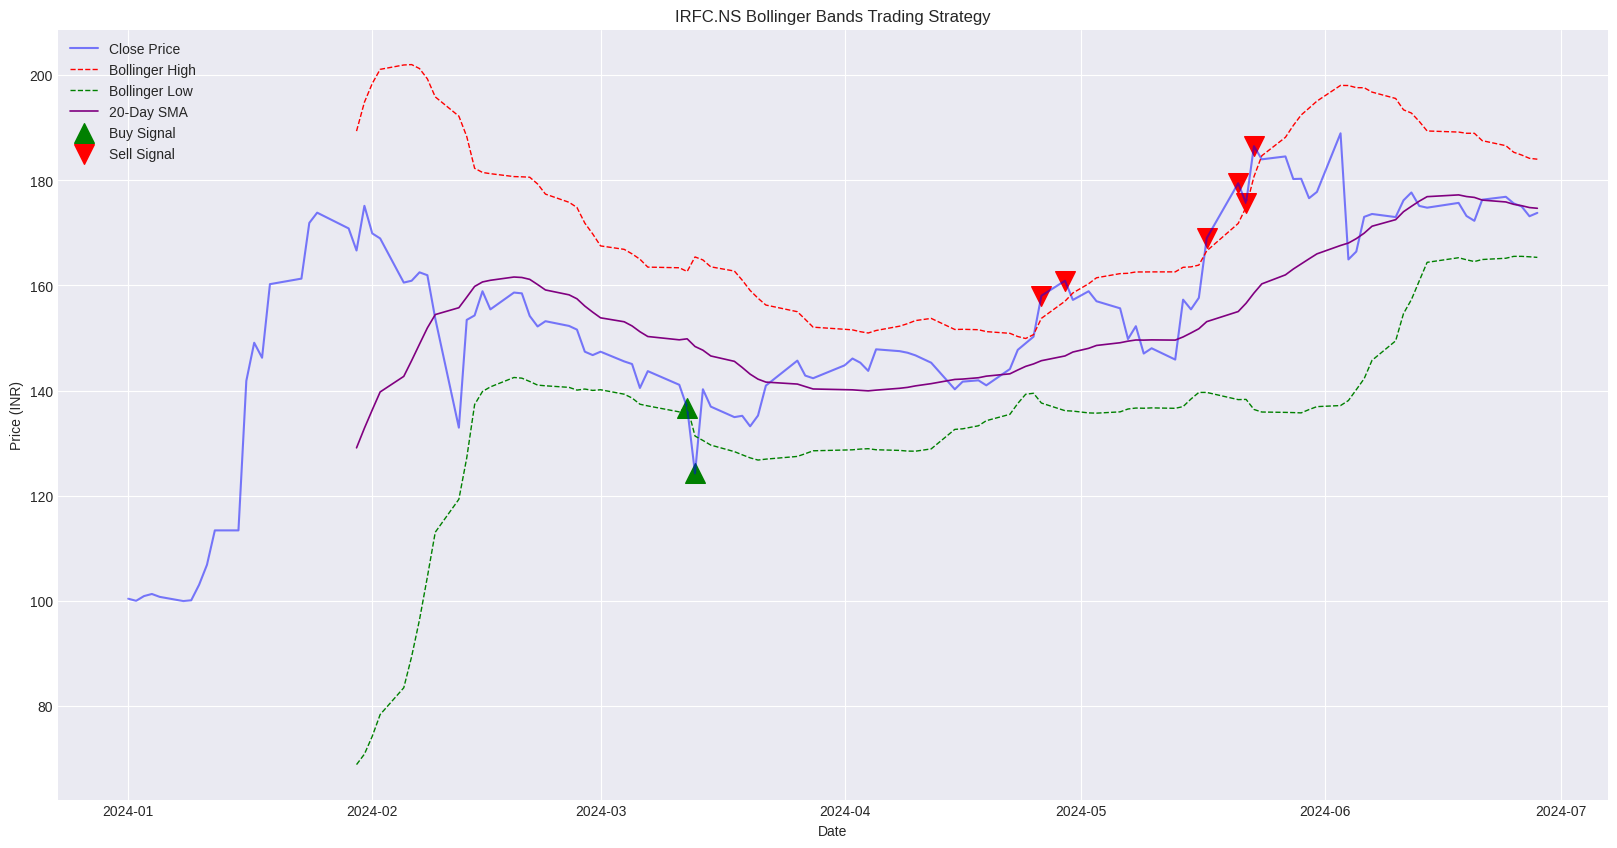

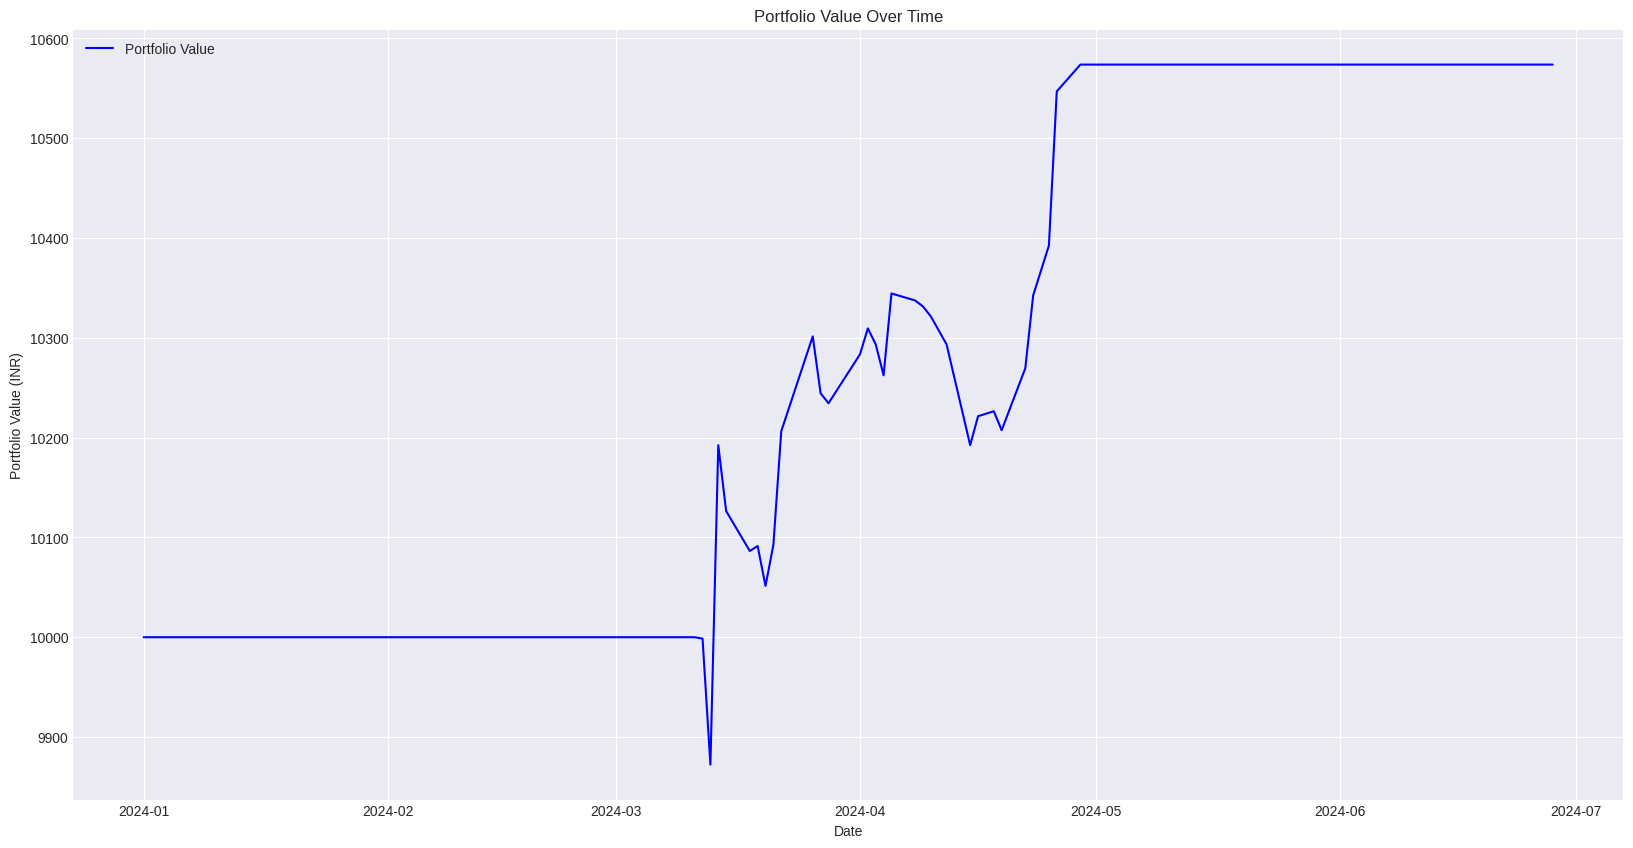

Total Return: 0.06
Max Drawdown: -0.01


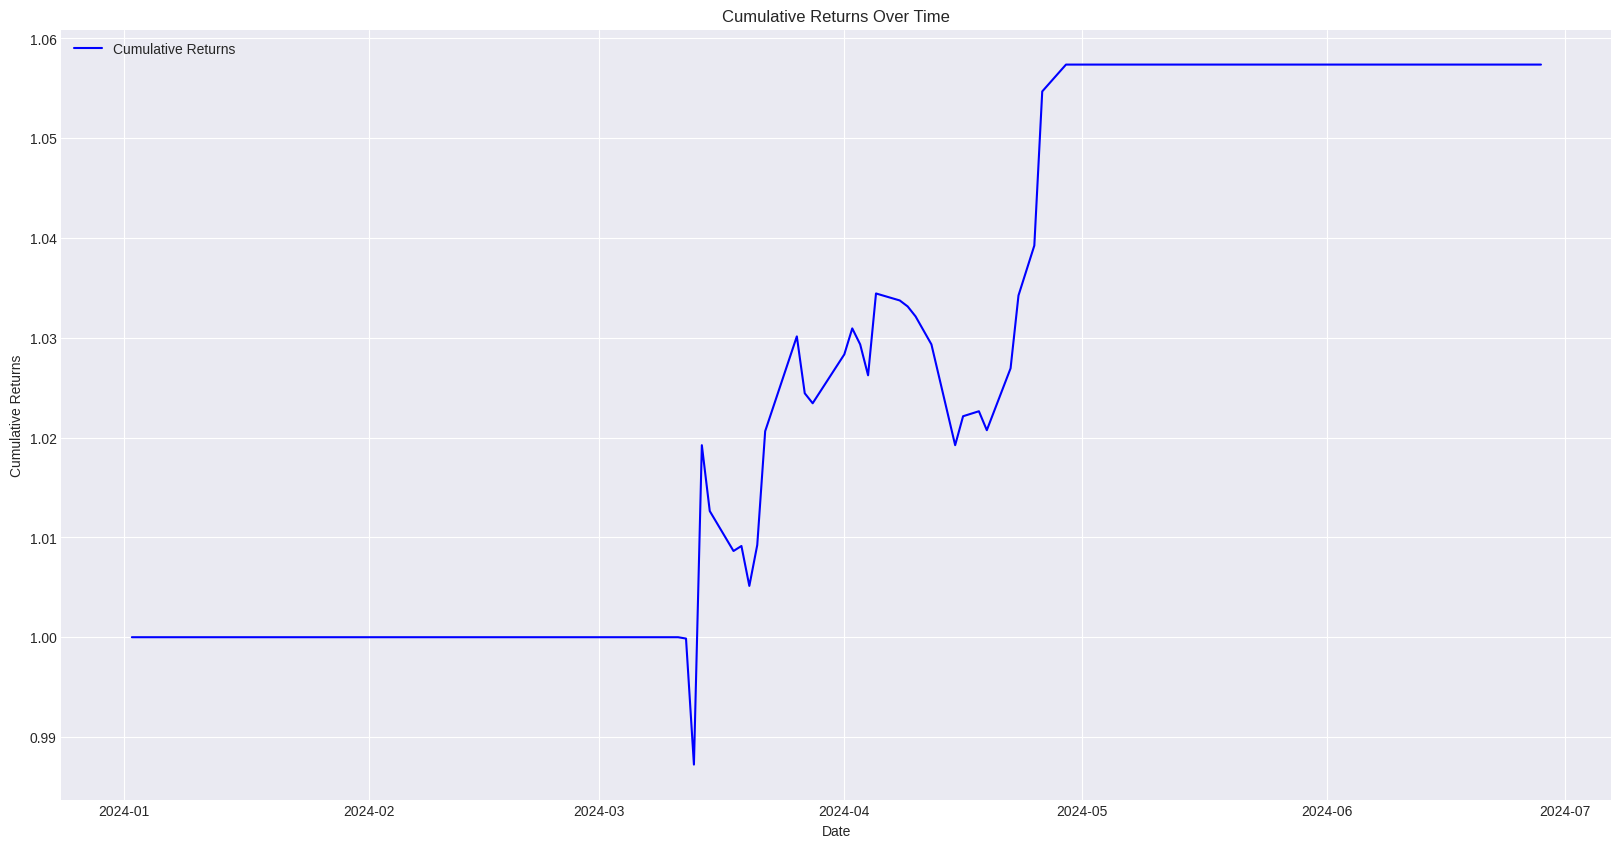

In [8]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Function to calculate Bollinger Bands
def bollinger_bands(data, window, no_of_std):
    rolling_mean = data['Close'].rolling(window).mean()
    rolling_std = data['Close'].rolling(window).std()
    data['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
    data['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std)
    return data

# Function to generate buy and sell signals
def bollinger_strategy(data):
    buy_signal = []
    sell_signal = []
    for i in range(len(data)):
        if data['Close'][i] < data['Bollinger Low'][i]:
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
        elif data['Close'][i] > data['Bollinger High'][i]:
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
    return buy_signal, sell_signal

# Function to backtest the strategy
def backtest_strategy(data, initial_balance=10000, shares=10, transaction_cost=0.001):
    balance = initial_balance
    position = 0
    portfolio_value = []
    position_value = 0

    for i in range(len(data)):
        if not np.isnan(data['Buy Signal'][i]) and balance >= shares * data['Close'][i]:
            position += shares
            balance -= shares * data['Close'][i] * (1 + transaction_cost)
        elif not np.isnan(data['Sell Signal'][i]) and position >= shares:
            position -= shares
            balance += shares * data['Close'][i] * (1 - transaction_cost)
        position_value = position * data['Close'][i]
        portfolio_value.append(balance + position_value)

    return portfolio_value

# Function to calculate performance metrics
def calculate_performance(data, initial_balance=10000):
    data['Returns'] = data['Portfolio Value'].pct_change()
    data['Cumulative Returns'] = (1 + data['Returns']).cumprod()
    data['Drawdown'] = data['Cumulative Returns'] / data['Cumulative Returns'].cummax() - 1
    max_drawdown = data['Drawdown'].min()
    total_return = data['Portfolio Value'][-1] / initial_balance - 1
    return total_return, max_drawdown

# Download stock data
ticker = 'IRFC.NS'
start_date = '2024-01-01'
end_date = '2024-07-01'
data = yf.download(ticker, start=start_date, end=end_date)

# Calculate Bollinger Bands
window = 20
no_of_std = 2
data = bollinger_bands(data, window, no_of_std)

# Generate buy and sell signals
data['Buy Signal'], data['Sell Signal'] = bollinger_strategy(data)
# Backtest the strategy
data['Portfolio Value'] = backtest_strategy(data)

# Calculate performance metrics
initial_balance = 10000
total_return, max_drawdown = calculate_performance(data, initial_balance)

# Plotting
plt.figure(figsize=(20,10))
plt.style.use('seaborn-darkgrid')

plt.plot(data['Close'], label='Close Price', alpha=0.5, color='blue')
plt.plot(data['Bollinger High'], label='Bollinger High', linestyle='--', linewidth=1, color='red')
plt.plot(data['Bollinger Low'], label='Bollinger Low', linestyle='--', linewidth=1, color='green')
plt.plot(data['Close'].rolling(window).mean(), label='20-Day SMA', linewidth=1.2, color='purple')

plt.scatter(data.index, data['Buy Signal'], label='Buy Signal', marker='^', alpha=1, color='green', s=200)
plt.scatter(data.index, data['Sell Signal'], label='Sell Signal', marker='v', alpha=1, color='red', s=200)

plt.title(f'{ticker} Bollinger Bands Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend(loc='upper left')
plt.grid(True)
# Plot Portfolio Value
plt.figure(figsize=(20,10))
plt.plot(data['Portfolio Value'], label='Portfolio Value', color='blue')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (INR)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

print(f'Total Return: {total_return:.2f}')
print(f'Max Drawdown: {max_drawdown:.2f}')

# Plot Cumulative Returns
plt.figure(figsize=(20,10))
plt.plot(data['Cumulative Returns'], label='Cumulative Returns', color='blue')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(loc='upper left')
plt.grid(True)

# **INTRADAY MOMENTUM INDEX**

Calculations and procedures for the Intraday Momentum Index
The following formula is used to calculate the IMI.

IMI = gains / gains + losses ✖ 100

Where gains are the sum of positive price changes multiplied by their respective trading volumes, losses are the sum of negative price changes multiplied by their respective trading volumes.

The process of calculating the Intraday Momentum Index

1. Identifying data inputs First, traders will need to obtain the data inputs that are required for IMI calculations, namely high, low, open, and closed prices and the trading volume of the security concerned.

2. Computing price differences By subtracting the open price from the high price and the low price from the open price, traders must calculate the price difference. For the calculation of the IMI, this step provides the necessary data on gains and losses.

3. Calculating IMI Values Finally, traders are required to calculate the IMI by dividing the amount of gains by the total of losses and multiplying the result by 100. The resulting values generally range from zero to 100, with higher values indicating stronger upward momentum and lower values suggesting downward momentum.

[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-07159d526e8e>:88: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


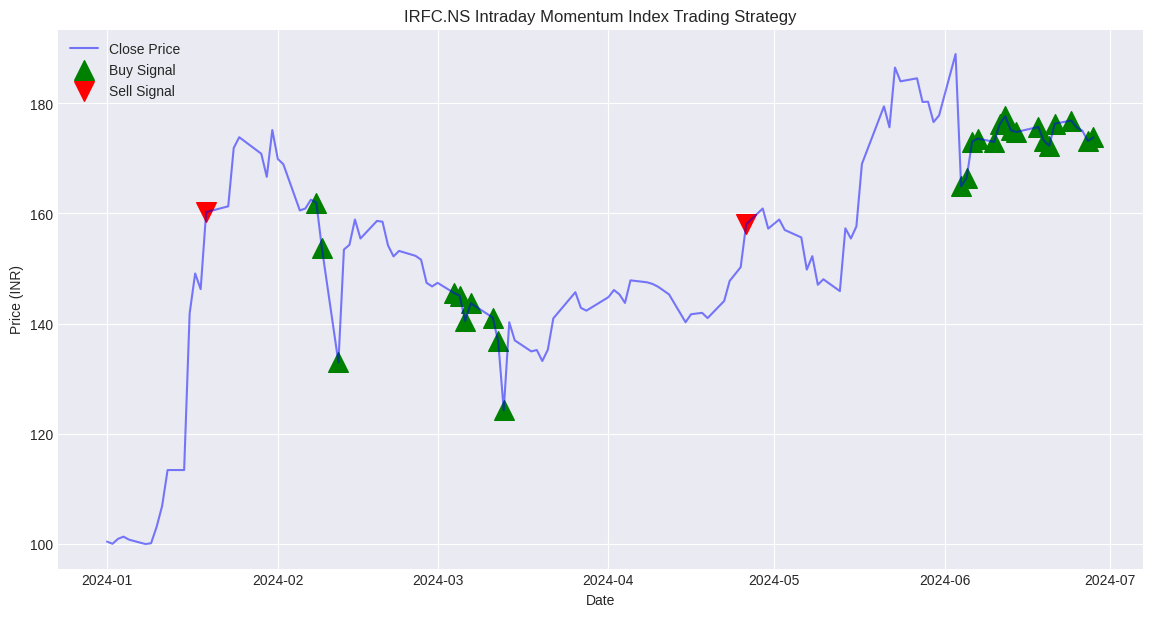

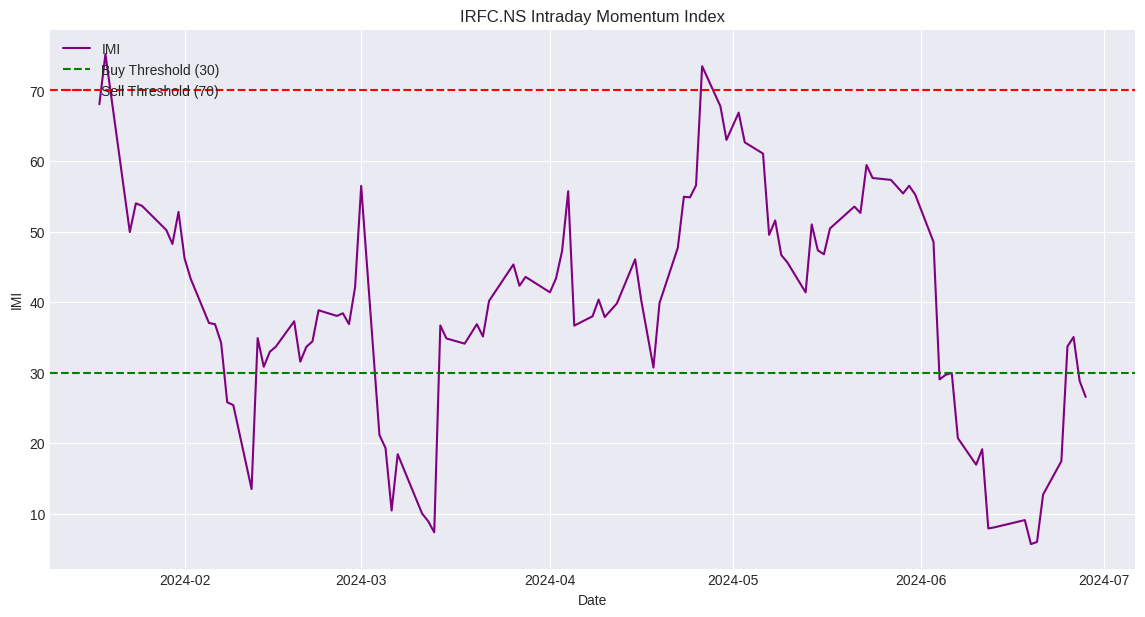

Total Return: 15.51%
Maximum Drawdown: -15.84%


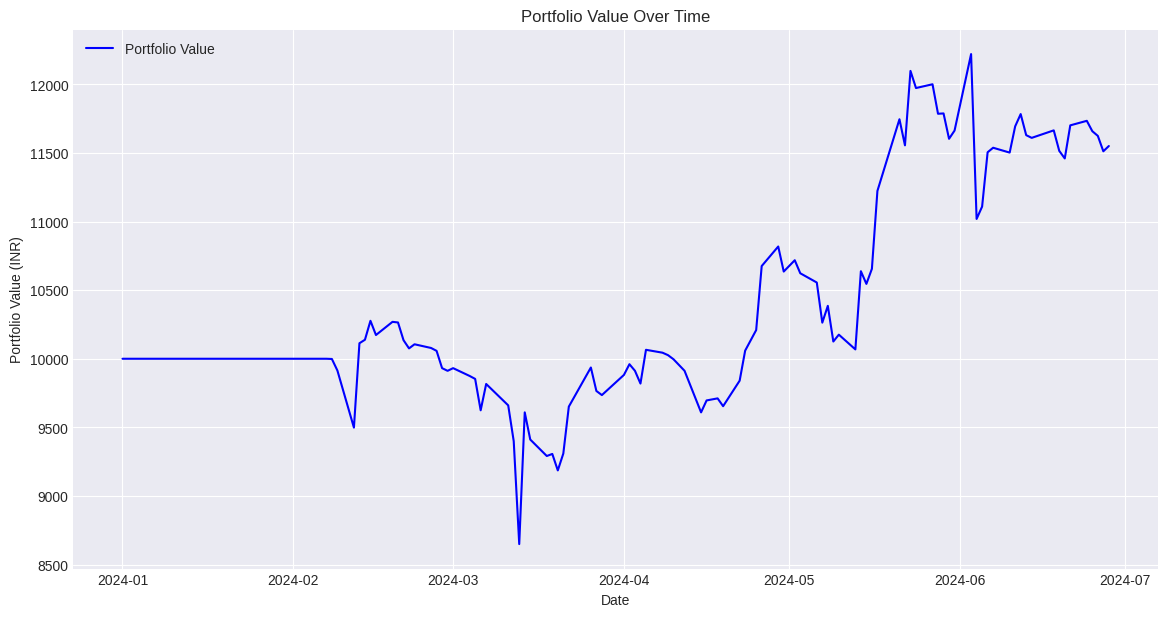

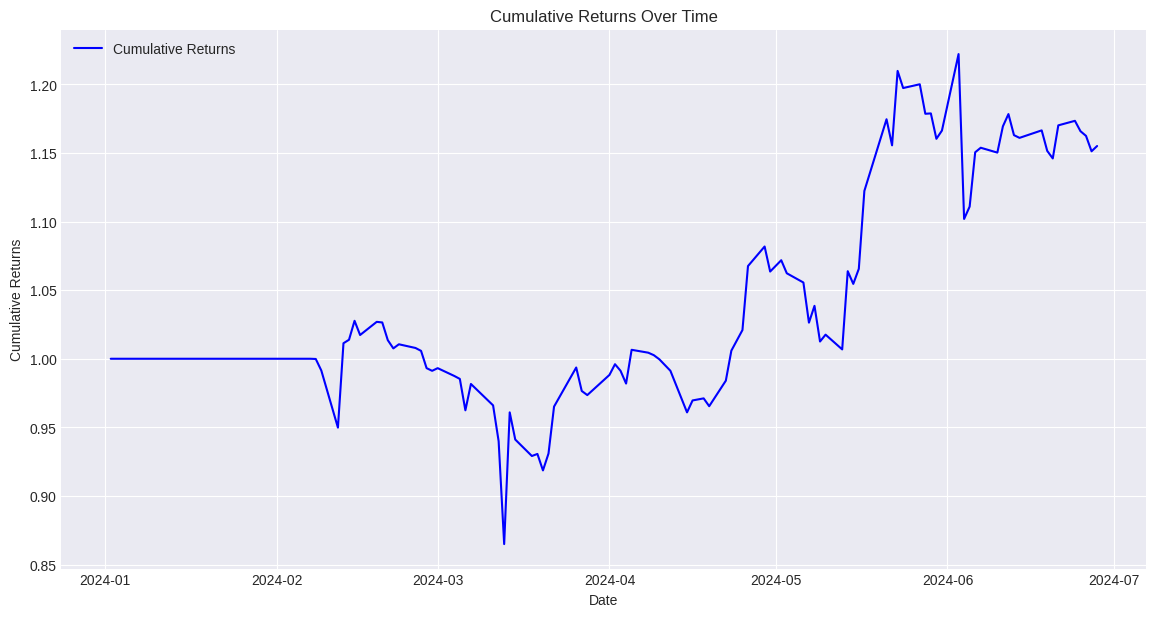

In [10]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Function to calculate Intraday Momentum Index (IMI)
def intraday_momentum(data, window):
    if len(data) < window:
        raise ValueError("Data length must be greater than window length")

    data['Gain'] = np.where(data['Close'] > data['Open'], data['Close'] - data['Open'], 0)
    data['Loss'] = np.where(data['Close'] < data['Open'], data['Open'] - data['Close'], 0)

    rolling_gain = data['Gain'].rolling(window).sum()
    rolling_loss = data['Loss'].rolling(window).sum()

    data['IMI'] = (rolling_gain / (rolling_gain + rolling_loss)) * 100
    return data

# Function to generate buy and sell signals based on IMI
def imi_signals(data, buy_threshold=30, sell_threshold=70):
    buy_signal = []
    sell_signal = []

    for i in range(len(data)):
        if data['IMI'][i] < buy_threshold:
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
        elif data['IMI'][i] > sell_threshold:
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)

    return buy_signal, sell_signal

# Function to backtest the strategy
def backtest_strategy(data, initial_balance=10000, shares=10, transaction_cost=0.001):
    balance = initial_balance
    position = 0
    portfolio_value = []
    position_value = 0

    for i in range(len(data)):
        if not np.isnan(data['Buy Signal'][i]) and balance >= shares * data['Close'][i]:
            position += shares
            balance -= shares * data['Close'][i] * (1 + transaction_cost)
        elif not np.isnan(data['Sell Signal'][i]) and position >= shares:
            position -= shares
            balance += shares * data['Close'][i] * (1 - transaction_cost)
        position_value = position * data['Close'][i]
        portfolio_value.append(balance + position_value)

    return portfolio_value

# Function to calculate performance metrics
def calculate_performance(data, initial_balance=10000):
    data['Returns'] = data['Portfolio Value'].pct_change()
    data['Cumulative Returns'] = (1 + data['Returns']).cumprod()
    data['Drawdown'] = data['Cumulative Returns'] / data['Cumulative Returns'].cummax() - 1
    max_drawdown = data['Drawdown'].min()
    total_return = data['Portfolio Value'][-1] / initial_balance - 1
    return total_return, max_drawdown

# Download stock data
ticker = 'IRFC.NS'
start_date = '2024-01-01'
end_date = '2024-07-01'
data = yf.download(ticker, start=start_date, end=end_date)

# Calculate Intraday Momentum Index (IMI)
window = 14
data = intraday_momentum(data, window)

# Generate buy and sell signals based on IMI
data['Buy Signal'], data['Sell Signal'] = imi_signals(data)

# Backtest the strategy
data['Portfolio Value'] = backtest_strategy(data)

# Calculate performance metrics
initial_balance = 10000
total_return, max_drawdown = calculate_performance(data, initial_balance)

# Plotting
plt.figure(figsize=(14,7))
plt.style.use('seaborn-darkgrid')

plt.plot(data['Close'], label='Close Price', alpha=0.5, color='blue')

plt.scatter(data.index, data['Buy Signal'], label='Buy Signal', marker='^', color='green', s=200)
plt.scatter(data.index, data['Sell Signal'], label='Sell Signal', marker='v', color='red', s=200)

plt.title(f'{ticker} Intraday Momentum Index Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

# Plotting IMI
plt.figure(figsize=(14,7))
plt.plot(data['IMI'], label='IMI', color='purple')
plt.axhline(y=30, color='green', linestyle='--', label='Buy Threshold (30)')
plt.axhline(y=70, color='red', linestyle='--', label='Sell Threshold (70)')

plt.title(f'{ticker} Intraday Momentum Index')
plt.xlabel('Date')
plt.ylabel('IMI')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

# Plot Portfolio Value
plt.figure(figsize=(14,7))
plt.plot(data['Portfolio Value'], label='Portfolio Value', color='blue')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (INR)')
plt.legend(loc='upper left')
plt.grid(True)

# Print Performance Metrics
print(f'Total Return: {total_return * 100:.2f}%')
print(f'Maximum Drawdown: {max_drawdown * 100:.2f}%')

# Plot Cumulative Returns
plt.figure(figsize=(14,7))
plt.plot(data['Cumulative Returns'], label='Cumulative Returns', color='blue')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

# **COMBINING IMI AND BOLLINGER BANDS**

[*********************100%%**********************]  1 of 1 completed
<ipython-input-11-0b324b6ff651>:100: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


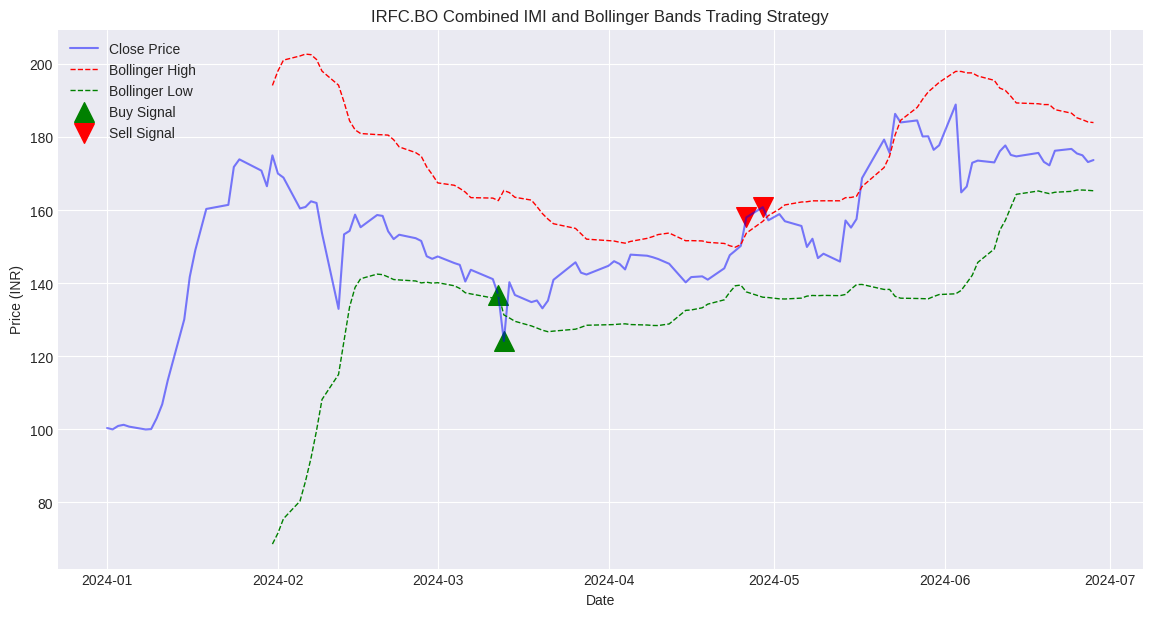

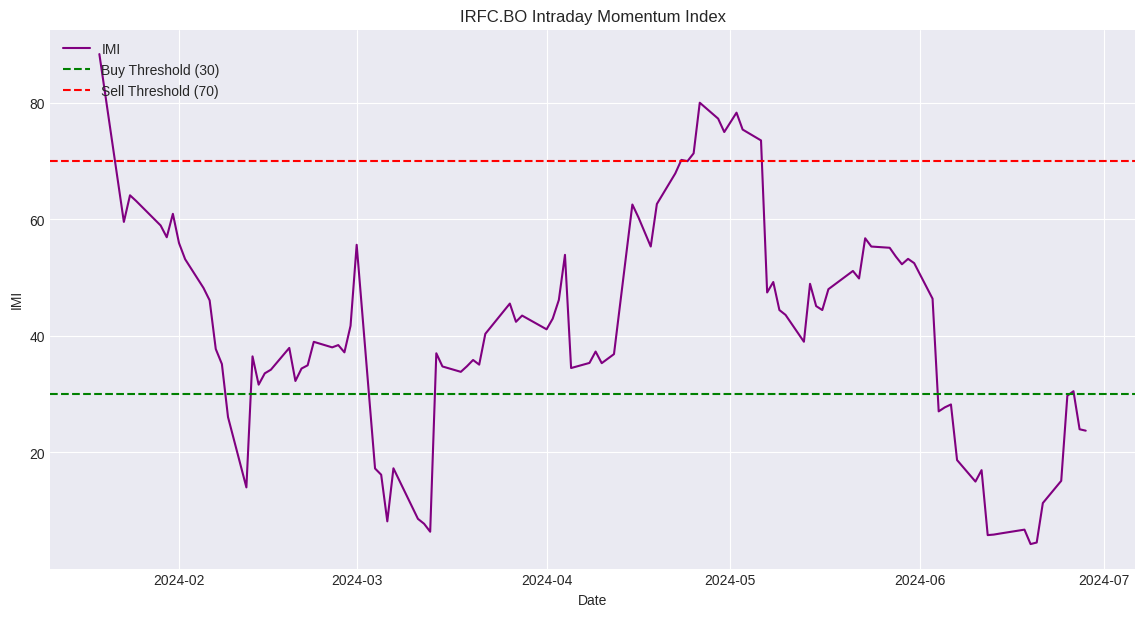

Total Return: 5.74%
Maximum Drawdown: -1.47%


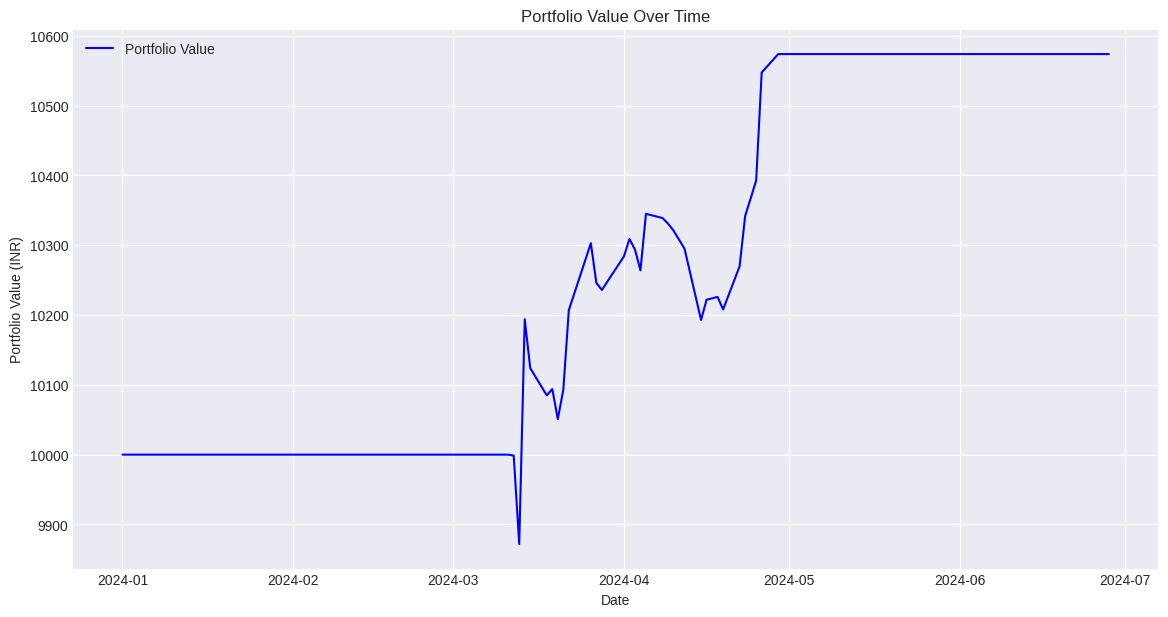

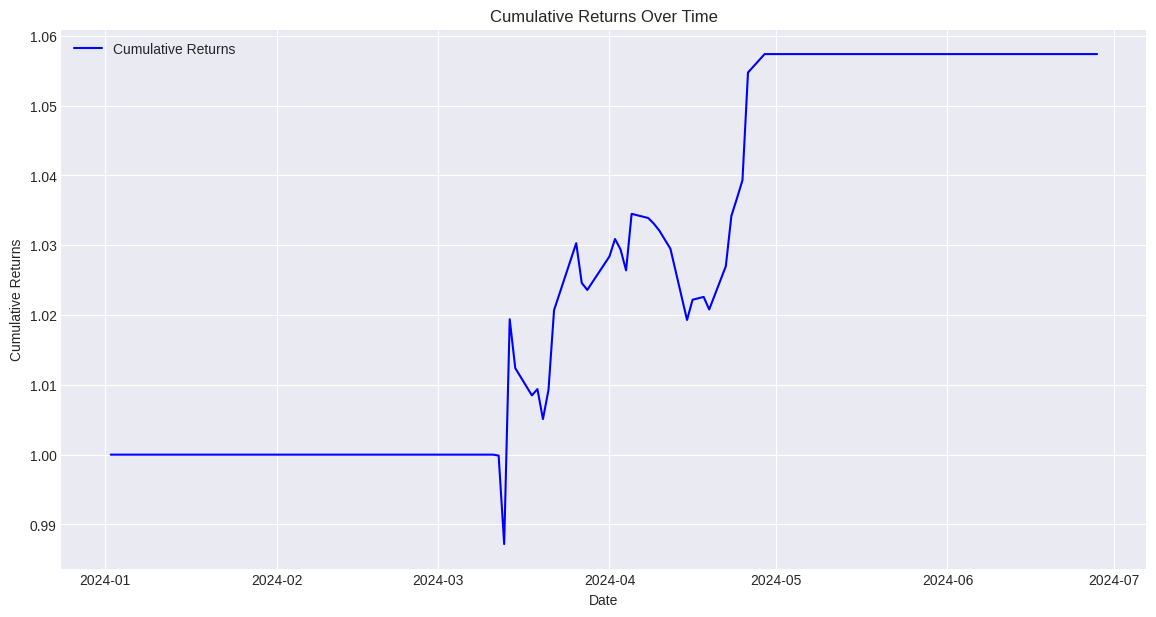

In [11]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Function to calculate Intraday Momentum Index (IMI)
def intraday_momentum(data, window):
    if len(data) < window:
        raise ValueError("Data length must be greater than window length")

    data['Gain'] = np.where(data['Close'] > data['Open'], data['Close'] - data['Open'], 0)
    data['Loss'] = np.where(data['Close'] < data['Open'], data['Open'] - data['Close'], 0)

    rolling_gain = data['Gain'].rolling(window).sum()
    rolling_loss = data['Loss'].rolling(window).sum()

    data['IMI'] = (rolling_gain / (rolling_gain + rolling_loss)) * 100
    return data

# Function to calculate Bollinger Bands
def bollinger_bands(data, window, no_of_std):
    data['Rolling Mean'] = data['Close'].rolling(window).mean()
    data['Bollinger High'] = data['Rolling Mean'] + (data['Close'].rolling(window).std() * no_of_std)
    data['Bollinger Low'] = data['Rolling Mean'] - (data['Close'].rolling(window).std() * no_of_std)
    return data

# Function to generate combined buy and sell signals based on IMI and Bollinger Bands
def combined_signals(data, buy_threshold=30, sell_threshold=70):
    buy_signal = []
    sell_signal = []

    for i in range(len(data)):
        if data['IMI'][i] < buy_threshold and data['Close'][i] < data['Bollinger Low'][i]:
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
        elif data['IMI'][i] > sell_threshold and data['Close'][i] > data['Bollinger High'][i]:
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)

    return buy_signal, sell_signal

# Function to backtest the strategy
def backtest_strategy(data, initial_balance=10000, shares=10, transaction_cost=0.001):
    balance = initial_balance
    position = 0
    portfolio_value = []
    position_value = 0

    for i in range(len(data)):
        if not np.isnan(data['Buy Signal'][i]) and balance >= shares * data['Close'][i]:
            position += shares
            balance -= shares * data['Close'][i] * (1 + transaction_cost)
        elif not np.isnan(data['Sell Signal'][i]) and position >= shares:
            position -= shares
            balance += shares * data['Close'][i] * (1 - transaction_cost)
        position_value = position * data['Close'][i]
        portfolio_value.append(balance + position_value)

    return portfolio_value

# Function to calculate performance metrics
def calculate_performance(data, initial_balance=10000):
    data['Returns'] = data['Portfolio Value'].pct_change()
    data['Cumulative Returns'] = (1 + data['Returns']).cumprod()
    data['Drawdown'] = data['Cumulative Returns'] / data['Cumulative Returns'].cummax() - 1
    max_drawdown = data['Drawdown'].min()
    total_return = data['Portfolio Value'][-1] / initial_balance - 1
    return total_return, max_drawdown

# Download stock data
ticker = 'IRFC.BO'
start_date = '2024-01-01'
end_date = '2024-07-01'
data = yf.download(ticker, start=start_date, end=end_date)

# Calculate Intraday Momentum Index (IMI)
window_imi = 14
data = intraday_momentum(data, window_imi)

# Calculate Bollinger Bands
window_bb = 20
no_of_std = 2
data = bollinger_bands(data, window_bb, no_of_std)

# Generate combined buy and sell signals based on IMI and Bollinger Bands
data['Buy Signal'], data['Sell Signal'] = combined_signals(data)

# Backtest the combined strategy
data['Portfolio Value'] = backtest_strategy(data)

# Calculate performance metrics
initial_balance = 10000
total_return, max_drawdown = calculate_performance(data, initial_balance)

# Plotting
plt.figure(figsize=(14,7))
plt.style.use('seaborn-darkgrid')

plt.plot(data['Close'], label='Close Price', alpha=0.5, color='blue')
plt.plot(data['Bollinger High'], label='Bollinger High', linestyle='--', linewidth=1.0, color='red')
plt.plot(data['Bollinger Low'], label='Bollinger Low', linestyle='--', linewidth=1.0, color='green')

plt.scatter(data.index, data['Buy Signal'], label='Buy Signal', marker='^', color='green', s=200)
plt.scatter(data.index, data['Sell Signal'], label='Sell Signal', marker='v', color='red', s=200)

plt.title(f'{ticker} Combined IMI and Bollinger Bands Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

# Plotting IMI
plt.figure(figsize=(14,7))
plt.plot(data['IMI'], label='IMI', color='purple')
plt.axhline(y=30, color='green', linestyle='--', label='Buy Threshold (30)')
plt.axhline(y=70, color='red', linestyle='--', label='Sell Threshold (70)')

plt.title(f'{ticker} Intraday Momentum Index')
plt.xlabel('Date')
plt.ylabel('IMI')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

# Plot Portfolio Value
plt.figure(figsize=(14,7))
plt.plot(data['Portfolio Value'], label='Portfolio Value', color='blue')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (INR)')
plt.legend(loc='upper left')
plt.grid(True)

# Print Performance Metrics
print(f'Total Return: {total_return * 100:.2f}%')
print(f'Maximum Drawdown: {max_drawdown * 100:.2f}%')

# Plot Cumulative Returns
plt.figure(figsize=(14,7))
plt.plot(data['Cumulative Returns'], label='Cumulative Returns', color='blue')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

# **Stochastic Oscillator:**

Formula for the Stochastic Oscillator
%K
=
(
C
−
L14/(H14
−
L14)
)
×
100
where:

C = The most recent closing price

L14 = The lowest price traded of the 14 previous trading sessions

H14 = The highest price traded during the same
14-day period


Notably, %K is referred to sometimes as the fast stochastic indicator. The "slow" stochastic indicator is taken as %D = 3-period moving average of %K.

The general theory serving as the foundation for this indicator is that in a market trending upward, prices will close near the high, and in a market trending downward, prices close near the low. Transaction signals are created when the %K crosses through a three-period moving average, which is called the %D.

The difference between the slow and fast Stochastic Oscillator is the Slow %K incorporates a %K slowing period of 3 that controls the internal smoothing of %K. Setting the smoothing period to 1 is equivalent to plotting the Fast Stochastic Oscillator.

[*********************100%%**********************]  1 of 1 completed
<ipython-input-12-19db42b332fc>:85: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


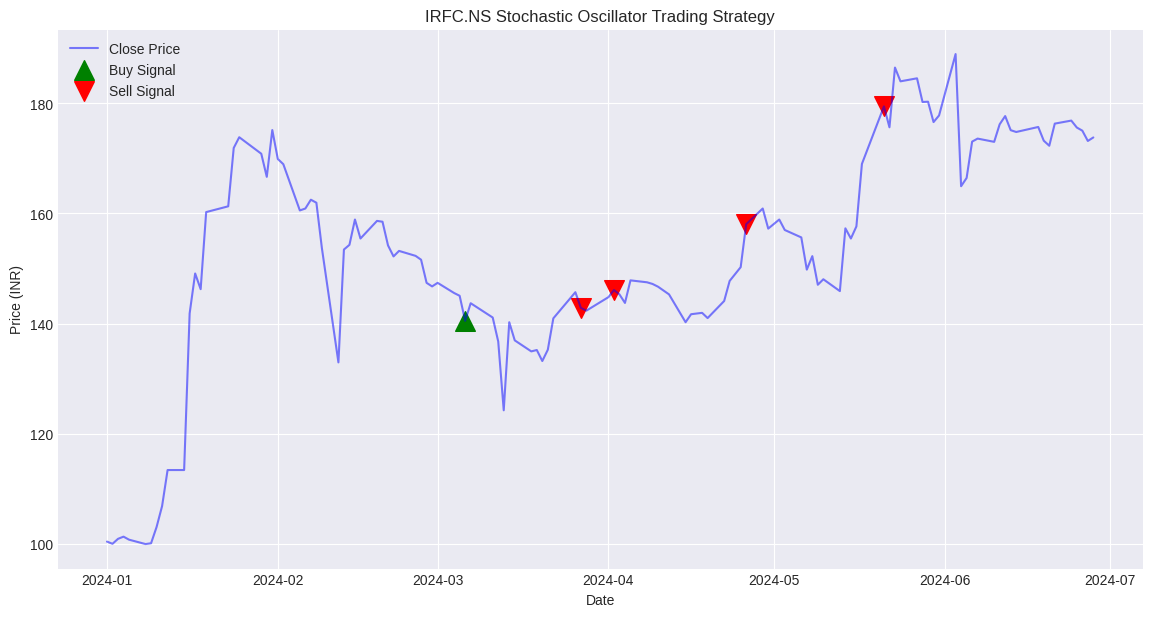

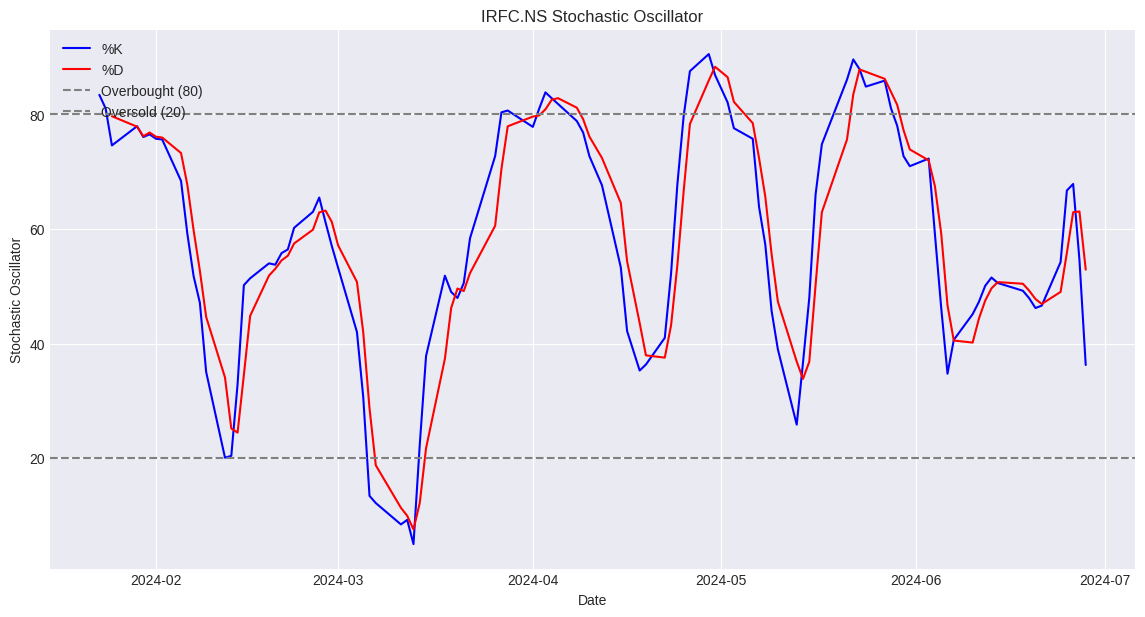

Total Return: 0.21%
Maximum Drawdown: -1.94%


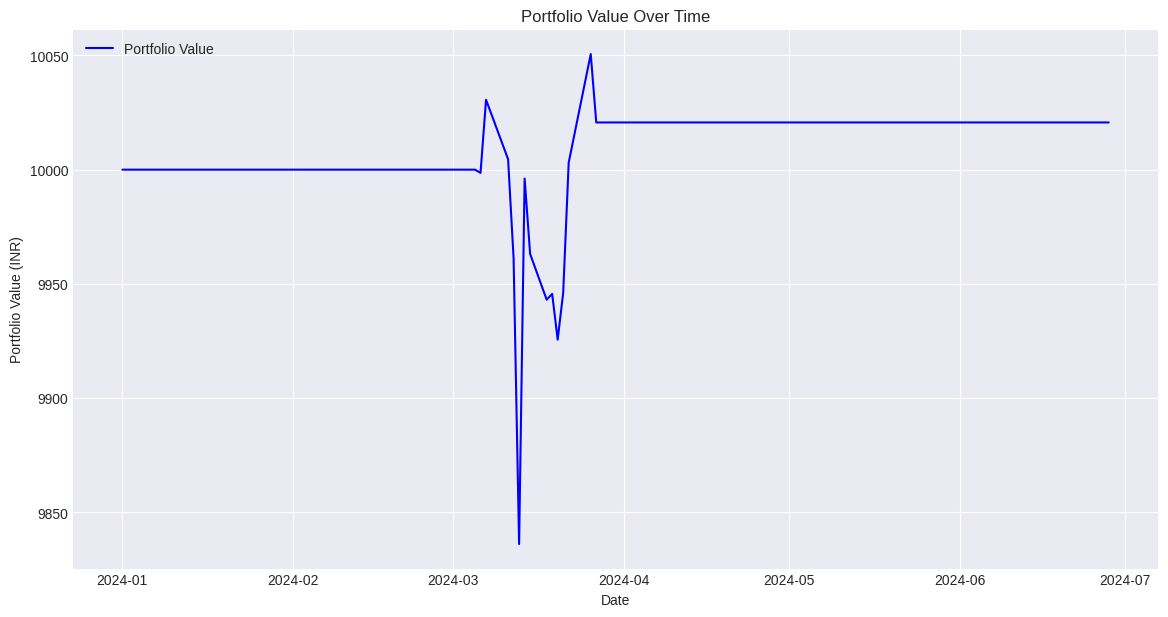

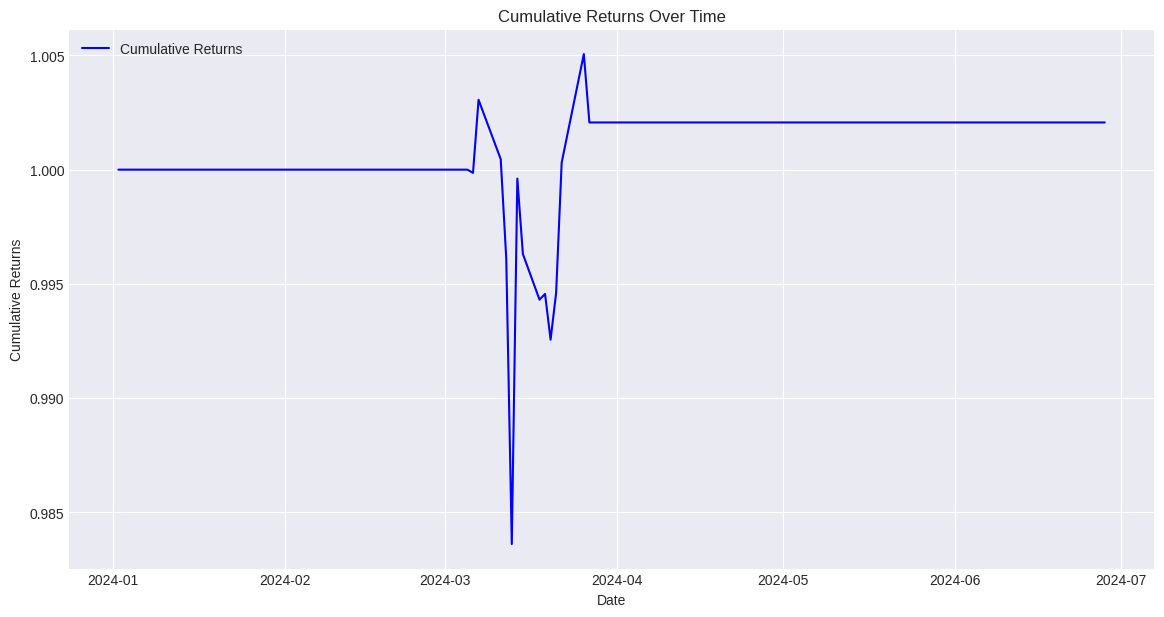

In [12]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Function to calculate Stochastic Oscillator
def stochastic_oscillator(data, lookback_period=14, smooth_k=3, smooth_d=3):
    data['Lowest Low'] = data['Low'].rolling(window=lookback_period).min()
    data['Highest High'] = data['High'].rolling(window=lookback_period).max()
    data['%K'] = (data['Close'] - data['Lowest Low']) / (data['Highest High'] - data['Lowest Low']) * 100
    data['%K'] = data['%K'].rolling(window=smooth_k).mean()  # Smoothing %K
    data['%D'] = data['%K'].rolling(window=smooth_d).mean()  # %D is the SMA of %K
    return data

# Function to generate buy and sell signals based on Stochastic Oscillator
def generate_stochastic_signals(data, buy_threshold=20, sell_threshold=80):
    buy_signal = []
    sell_signal = []

    for i in range(len(data)):
        if data['%K'][i] < buy_threshold and data['%K'][i-1] >= buy_threshold:
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
        elif data['%K'][i] > sell_threshold and data['%K'][i-1] <= sell_threshold:
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)

    return buy_signal, sell_signal

# Function to backtest the strategy
def backtest_strategy(data, initial_balance=10000, shares=10, transaction_cost=0.001):
    balance = initial_balance
    position = 0
    portfolio_value = []
    position_value = 0

    for i in range(len(data)):
        if not np.isnan(data['Buy Signal'][i]) and balance >= shares * data['Close'][i]:
            position += shares
            balance -= shares * data['Close'][i] * (1 + transaction_cost)
        elif not np.isnan(data['Sell Signal'][i]) and position >= shares:
            position -= shares
            balance += shares * data['Close'][i] * (1 - transaction_cost)
        position_value = position * data['Close'][i]
        portfolio_value.append(balance + position_value)

    return portfolio_value

# Function to calculate performance metrics
def calculate_performance(data, initial_balance=10000):
    data['Returns'] = data['Portfolio Value'].pct_change()
    data['Cumulative Returns'] = (1 + data['Returns']).cumprod()
    data['Drawdown'] = data['Cumulative Returns'] / data['Cumulative Returns'].cummax() - 1
    max_drawdown = data['Drawdown'].min()
    total_return = data['Portfolio Value'][-1] / initial_balance - 1
    return total_return, max_drawdown

# Download stock data
ticker = 'IRFC.NS'
start_date = '2024-01-01'
end_date = '2024-07-01'
data = yf.download(ticker, start=start_date, end=end_date)

# Calculate Stochastic Oscillator
lookback_period = 14
smooth_k = 3
smooth_d = 3
data = stochastic_oscillator(data, lookback_period, smooth_k, smooth_d)

# Generate buy and sell signals based on Stochastic Oscillator
data['Buy Signal'], data['Sell Signal'] = generate_stochastic_signals(data)

# Backtest the combined strategy
data['Portfolio Value'] = backtest_strategy(data)

# Calculate performance metrics
initial_balance = 10000
total_return, max_drawdown = calculate_performance(data, initial_balance)

# Plotting
plt.figure(figsize=(14,7))
plt.style.use('seaborn-darkgrid')

plt.plot(data['Close'], label='Close Price', alpha=0.5, color='blue')
plt.scatter(data.index, data['Buy Signal'], label='Buy Signal', marker='^', color='green', s=200)
plt.scatter(data.index, data['Sell Signal'], label='Sell Signal', marker='v', color='red', s=200)

plt.title(f'{ticker} Stochastic Oscillator Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

# Plotting Stochastic Oscillator
plt.figure(figsize=(14,7))
plt.plot(data['%K'], label='%K', color='blue')
plt.plot(data['%D'], label='%D', color='red')
plt.axhline(y=80, color='gray', linestyle='--', label='Overbought (80)')
plt.axhline(y=20, color='gray', linestyle='--', label='Oversold (20)')

plt.title(f'{ticker} Stochastic Oscillator')
plt.xlabel('Date')
plt.ylabel('Stochastic Oscillator')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

# Plot Portfolio Value
plt.figure(figsize=(14,7))
plt.plot(data['Portfolio Value'], label='Portfolio Value', color='blue')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (INR)')
plt.legend(loc='upper left')
plt.grid(True)

# Print Performance Metrics
print(f'Total Return: {total_return * 100:.2f}%')
print(f'Maximum Drawdown: {max_drawdown * 100:.2f}%')

# Plot Cumulative Returns
plt.figure(figsize=(14,7))
plt.plot(data['Cumulative Returns'], label='Cumulative Returns', color='blue')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

# **Stochastic Oscillator and Bollinger Band**

[*********************100%%**********************]  1 of 1 completed
<ipython-input-13-4ea7cc7dbf7b>:98: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


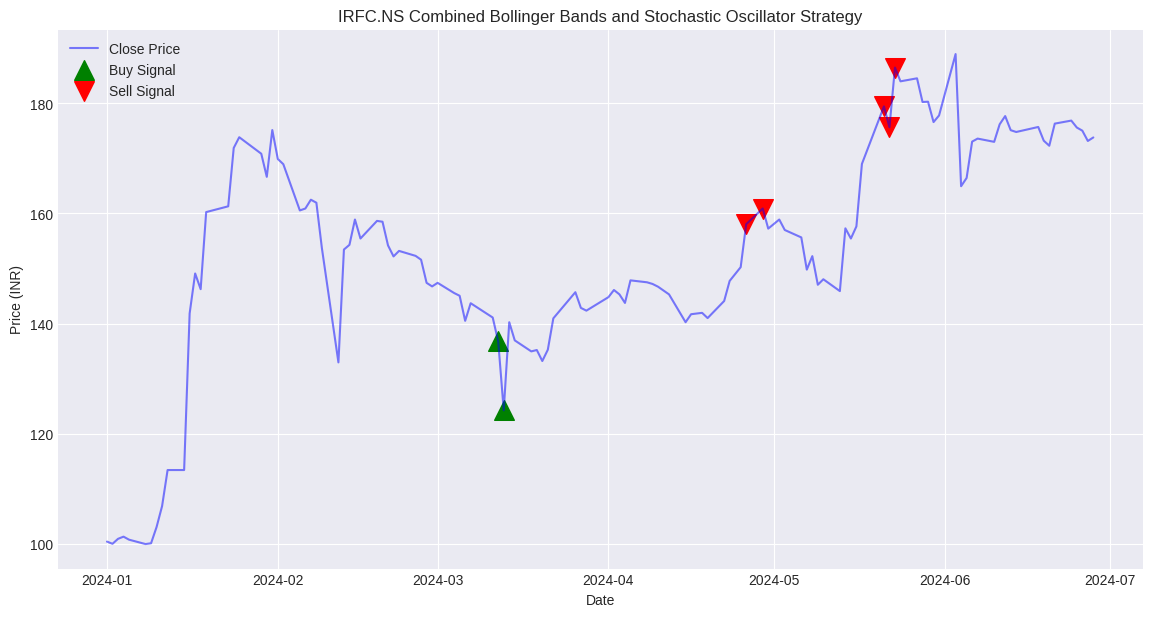

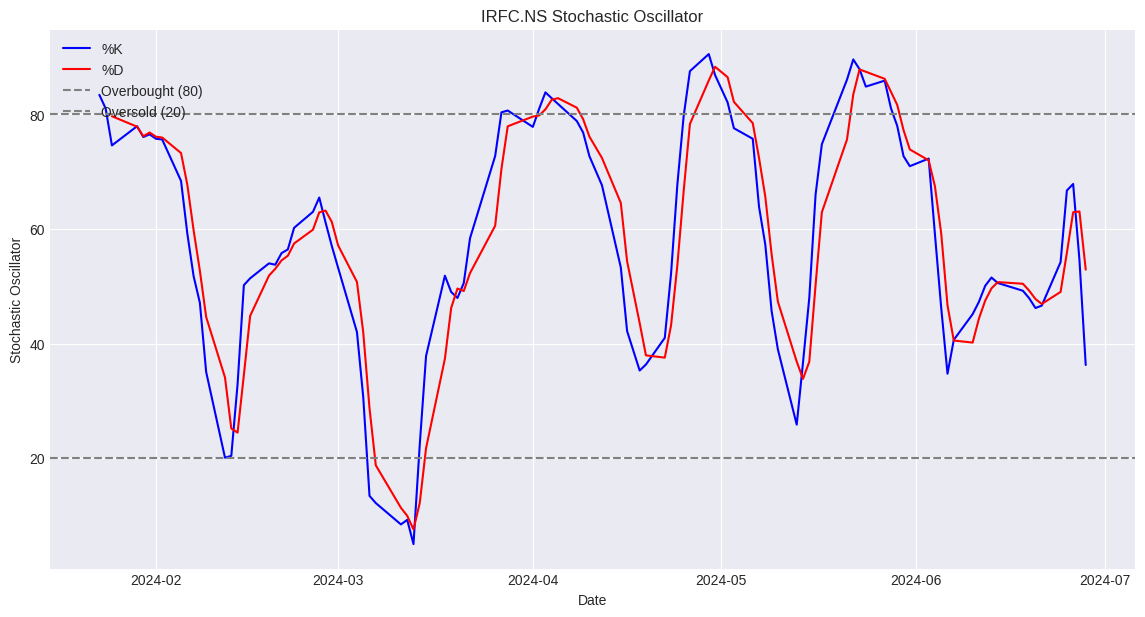

Total Return: 5.74%
Maximum Drawdown: -1.47%


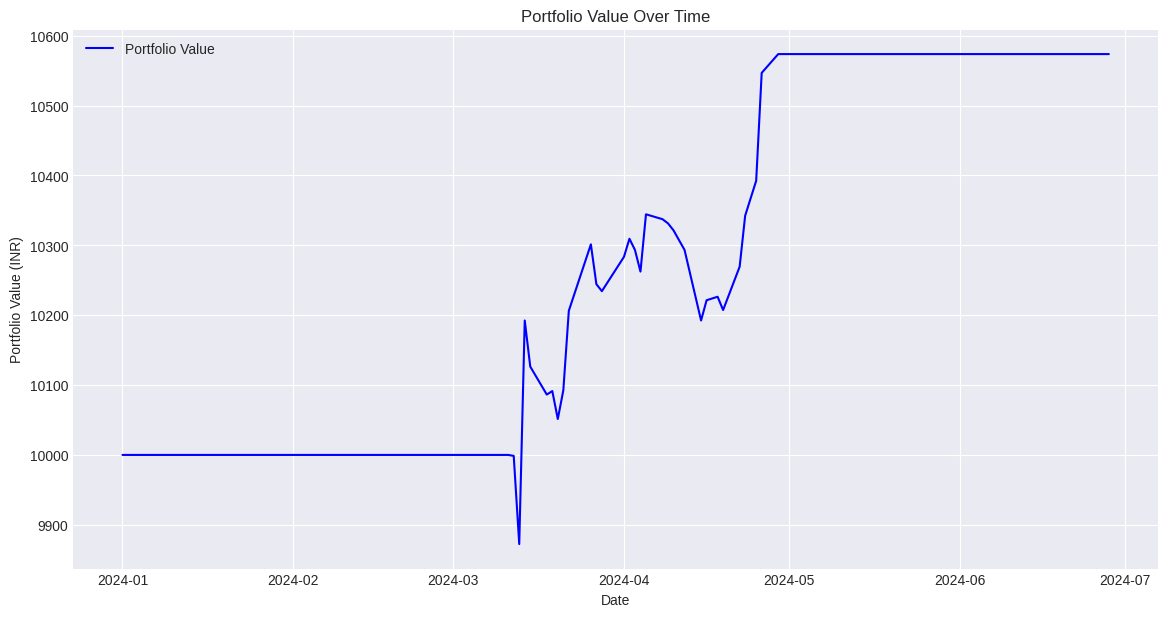

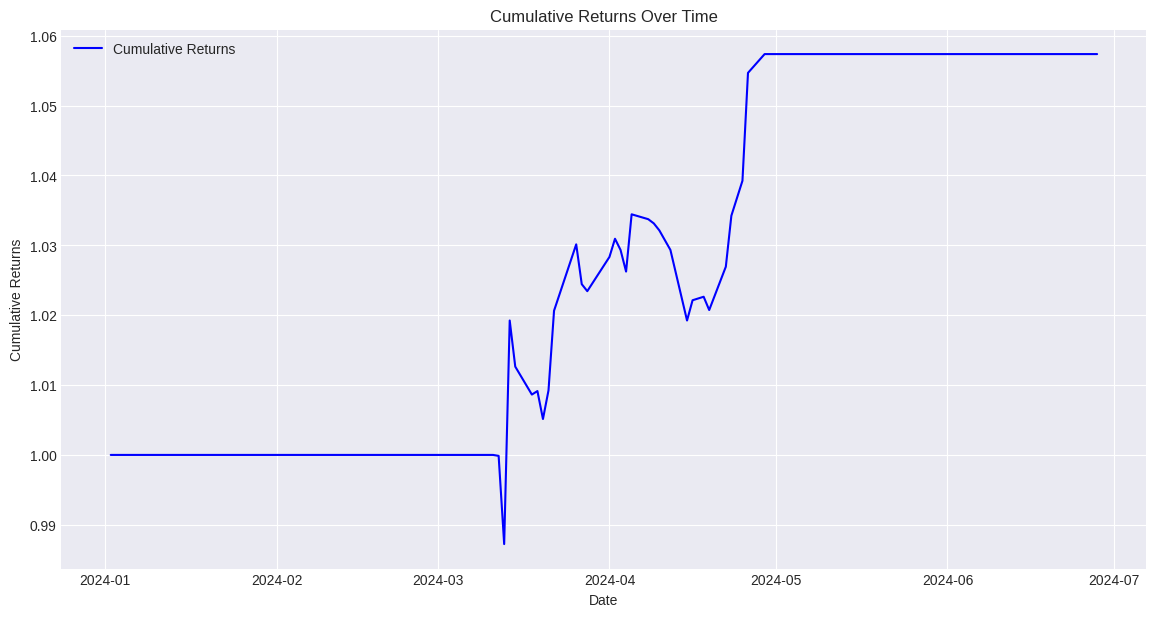

In [13]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Function to calculate Bollinger Bands
def bollinger_bands(data, window, no_of_std):
    data['Rolling Mean'] = data['Close'].rolling(window=window).mean()
    data['Rolling Std'] = data['Close'].rolling(window=window).std()
    data['Upper Band'] = data['Rolling Mean'] + (data['Rolling Std'] * no_of_std)
    data['Lower Band'] = data['Rolling Mean'] - (data['Rolling Std'] * no_of_std)
    return data

# Function to calculate Stochastic Oscillator
def stochastic_oscillator(data, lookback_period=14, smooth_k=3, smooth_d=3):
    data['Lowest Low'] = data['Low'].rolling(window=lookback_period).min()
    data['Highest High'] = data['High'].rolling(window=lookback_period).max()
    data['%K'] = (data['Close'] - data['Lowest Low']) / (data['Highest High'] - data['Lowest Low']) * 100
    data['%K'] = data['%K'].rolling(window=smooth_k).mean()  # Smoothing %K
    data['%D'] = data['%K'].rolling(window=smooth_d).mean()  # %D is the SMA of %K
    return data

# Function to generate buy and sell signals based on both Bollinger Bands and Stochastic Oscillator
def generate_combined_signals(data, buy_threshold=20, sell_threshold=80):
    buy_signal = []
    sell_signal = []

    for i in range(len(data)):
        if data['Close'][i] < data['Lower Band'][i] and data['%K'][i] < buy_threshold:
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
        elif data['Close'][i] > data['Upper Band'][i] and data['%K'][i] > sell_threshold:
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)

    return buy_signal, sell_signal

# Function to backtest the strategy
def backtest_strategy(data, initial_balance=10000, shares=10, transaction_cost=0.001):
    balance = initial_balance
    position = 0
    portfolio_value = []
    position_value = 0

    for i in range(len(data)):
        if not np.isnan(data['Buy Signal'][i]) and balance >= shares * data['Close'][i]:
            position += shares
            balance -= shares * data['Close'][i] * (1 + transaction_cost)
        elif not np.isnan(data['Sell Signal'][i]) and position >= shares:
            position -= shares
            balance += shares * data['Close'][i] * (1 - transaction_cost)
        position_value = position * data['Close'][i]
        portfolio_value.append(balance + position_value)

    return portfolio_value

# Function to calculate performance metrics
def calculate_performance(data, initial_balance=10000):
    data['Returns'] = data['Portfolio Value'].pct_change()
    data['Cumulative Returns'] = (1 + data['Returns']).cumprod()
    data['Drawdown'] = data['Cumulative Returns'] / data['Cumulative Returns'].cummax() - 1
    max_drawdown = data['Drawdown'].min()
    total_return = data['Portfolio Value'][-1] / initial_balance - 1
    return total_return, max_drawdown

# Download stock data
ticker = 'IRFC.NS'
start_date = '2024-01-01'
end_date = '2024-07-01'
data = yf.download(ticker, start=start_date, end=end_date)

# Calculate Bollinger Bands
window = 20
no_of_std = 2
data = bollinger_bands(data, window, no_of_std)

# Calculate Stochastic Oscillator
lookback_period = 14
smooth_k = 3
smooth_d = 3
data = stochastic_oscillator(data, lookback_period, smooth_k, smooth_d)

# Generate buy and sell signals based on both Bollinger Bands and Stochastic Oscillator
data['Buy Signal'], data['Sell Signal'] = generate_combined_signals(data)

# Backtest the combined strategy
data['Portfolio Value'] = backtest_strategy(data)

# Calculate performance metrics
initial_balance = 10000
total_return, max_drawdown = calculate_performance(data, initial_balance)

# Plotting the Buy/Sell signals with the Close price
plt.figure(figsize=(14,7))
plt.style.use('seaborn-darkgrid')

plt.plot(data['Close'], label='Close Price', alpha=0.5, color='blue')
plt.scatter(data.index, data['Buy Signal'], label='Buy Signal', marker='^', color='green', s=200)
plt.scatter(data.index, data['Sell Signal'], label='Sell Signal', marker='v', color='red', s=200)

plt.title(f'{ticker} Combined Bollinger Bands and Stochastic Oscillator Strategy')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

# Plotting the Stochastic Oscillator
plt.figure(figsize=(14,7))
plt.plot(data['%K'], label='%K', color='blue')
plt.plot(data['%D'], label='%D', color='red')
plt.axhline(y=80, color='gray', linestyle='--', label='Overbought (80)')
plt.axhline(y=20, color='gray', linestyle='--', label='Oversold (20)')

plt.title(f'{ticker} Stochastic Oscillator')
plt.xlabel('Date')
plt.ylabel('Stochastic Oscillator')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

# Plotting the Portfolio Value
plt.figure(figsize=(14,7))
plt.plot(data['Portfolio Value'], label='Portfolio Value', color='blue')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (INR)')
plt.legend(loc='upper left')
plt.grid(True)

# Print Performance Metrics
print(f'Total Return: {total_return * 100:.2f}%')
print(f'Maximum Drawdown: {max_drawdown * 100:.2f}%')

# Plotting the Cumulative Returns
plt.figure(figsize=(14,7))
plt.plot(data['Cumulative Returns'], label='Cumulative Returns', color='blue')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()